In [8]:
# Importing the necessary libraries first
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [9]:
# Now we take google stocks data using the ticker symbol "GOOG"
googleStocks= yahooFinance.Ticker("GOOG")


In [10]:
# Getting 5years history of GOOG stock price movements; opening and closing prices
dataFrame1= googleStocks.history("5Y")


In [11]:
# We can't print all history of 5years here, so we just print the head(1st 5 rows)
print(dataFrame1.head())


                                Open       High        Low      Close  \
Date                                                                    
2019-06-05 00:00:00-04:00  52.577000  52.677502  51.524502  52.111000   
2019-06-06 00:00:00-04:00  52.249500  52.374500  51.685001  52.216999   
2019-06-07 00:00:00-04:00  52.531502  53.546001  52.419998  53.301998   
2019-06-10 00:00:00-04:00  53.648998  54.632999  53.616100  54.019001   
2019-06-11 00:00:00-04:00  54.699001  55.099499  53.880150  53.936001   

                             Volume  Dividends  Stock Splits  
Date                                                          
2019-06-05 00:00:00-04:00  43368000        0.0           0.0  
2019-06-06 00:00:00-04:00  34064000        0.0           0.0  
2019-06-07 00:00:00-04:00  36048000        0.0           0.0  
2019-06-10 00:00:00-04:00  29284000        0.0           0.0  
2019-06-11 00:00:00-04:00  28734000        0.0           0.0  


In [12]:
print(dataFrame1.tail())


                                 Open        High         Low       Close  \
Date                                                                        
2024-05-30 00:00:00-04:00  176.690002  176.690002  173.229996  173.559998   
2024-05-31 00:00:00-04:00  173.399994  174.419998  170.970001  173.960007   
2024-06-03 00:00:00-04:00  173.880005  175.860001  172.449997  174.419998   
2024-06-04 00:00:00-04:00  174.449997  175.190002  173.220001  175.130005   
2024-06-05 00:00:00-04:00  176.535004  177.970001  175.289993  175.985001   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-05-30 00:00:00-04:00  18844000        0.0           0.0  
2024-05-31 00:00:00-04:00  28085200        0.0           0.0  
2024-06-03 00:00:00-04:00  20742800        0.0           0.0  
2024-06-04 00:00:00-04:00  12834700        0.0           0.0  
2024-06-05 00:00:00-04:00   7637570        0.0           0.0  


In [13]:
# Know shape of the dataFrame
print(dataFrame1.shape)


(1260, 7)


In [14]:
# Shows we have 1260 rows with 7 columns


In [15]:
print(dataFrame1.describe()) # describe the dataFrame we have


              Open         High          Low        Close        Volume  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1.260000e+03   
mean    106.821494   108.056845   105.732562   106.924279  2.838706e+07   
std      31.169347    31.413389    30.904901    31.168551  1.243399e+07   
min      52.249500    52.374500    50.676800    52.111000  6.936000e+06   
25%      76.146875    77.155748    75.399815    76.036753  2.032842e+07   
50%     107.675003   109.269997   106.406502   108.230000  2.537800e+07   
75%     134.208500   135.783512   132.867500   134.226997  3.244150e+07   
max     178.779999   179.949997   177.309998   179.539993  9.779860e+07   

       Dividends  Stock Splits  
count     1260.0   1260.000000  
mean         0.0      0.015873  
std          0.0      0.563436  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0     20.000000  


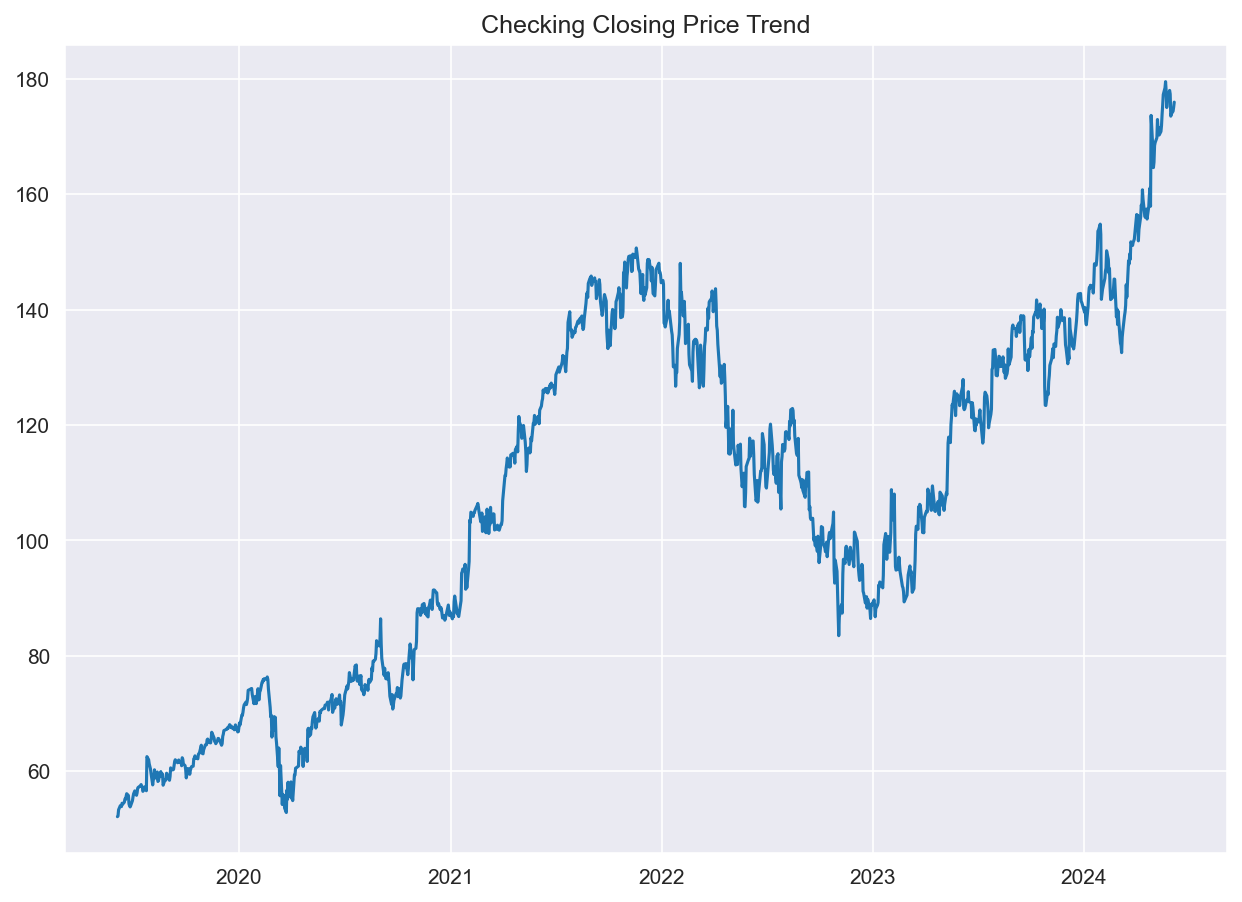

In [16]:
# Checking the overview of the closing price before calculating DMAs
sns.set_style('darkgrid')
plt.figure(figsize= (10,7), dpi=150)
plt.title("Checking Closing Price Trend")
plt.plot(dataFrame1["Close"])
plt.show()


In [17]:
# We now calculate the 50DMA(Day Moving Average)
dataFrame1["50-DMA"]= dataFrame1["Close"].rolling(50).mean()


In [18]:
# Again, calculate the 200DMA(Day Moving Average)
dataFrame1["200-DMA"]= dataFrame1["Close"].rolling(200).mean()


In [19]:
dataFrame1.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,50-DMA,200-DMA
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.0,1260.000000,1211.000000,1061.000000
mean,106.821494,108.056845,105.732562,106.924279,2.838706e+07,0.0,0.015873,106.673377,107.042789
std,31.169347,31.413389,30.904901,31.168551,1.243399e+07,0.0,0.563436,29.075458,24.505433
min,52.249500,52.374500,50.676800,52.111000,6.936000e+06,0.0,0.000000,56.707200,63.262863
25%,76.146875,77.155748,75.399815,76.036753,2.032842e+07,0.0,0.000000,77.212875,86.571062
50%,107.675003,109.269997,106.406502,108.230000,2.537800e+07,0.0,0.000000,110.583801,109.816325
75%,134.208500,135.783512,132.867500,134.226997,3.244150e+07,0.0,0.000000,134.683800,129.180275
max,178.779999,179.949997,177.309998,179.539993,9.779860e+07,0.0,20.000000,165.842700,145.438875


In [20]:
# Dividends and Stock Splits are invalid, as they are 0.0 all rows. We now remove them

dataFrame1.drop(columns= ["Dividends", "Stock Splits"], inplace=True)


In [21]:
#print df head and df tail again
# head
print(dataFrame1.head())


                                Open       High        Low      Close  \
Date                                                                    
2019-06-05 00:00:00-04:00  52.577000  52.677502  51.524502  52.111000   
2019-06-06 00:00:00-04:00  52.249500  52.374500  51.685001  52.216999   
2019-06-07 00:00:00-04:00  52.531502  53.546001  52.419998  53.301998   
2019-06-10 00:00:00-04:00  53.648998  54.632999  53.616100  54.019001   
2019-06-11 00:00:00-04:00  54.699001  55.099499  53.880150  53.936001   

                             Volume  50-DMA  200-DMA  
Date                                                  
2019-06-05 00:00:00-04:00  43368000     NaN      NaN  
2019-06-06 00:00:00-04:00  34064000     NaN      NaN  
2019-06-07 00:00:00-04:00  36048000     NaN      NaN  
2019-06-10 00:00:00-04:00  29284000     NaN      NaN  
2019-06-11 00:00:00-04:00  28734000     NaN      NaN  


In [22]:
# for the first 7 in head, we get bull (NaN), because it's calculating Moving Averages


In [23]:
# tail
print(dataFrame1.tail())


                                 Open        High         Low       Close  \
Date                                                                        
2024-05-30 00:00:00-04:00  176.690002  176.690002  173.229996  173.559998   
2024-05-31 00:00:00-04:00  173.399994  174.419998  170.970001  173.960007   
2024-06-03 00:00:00-04:00  173.880005  175.860001  172.449997  174.419998   
2024-06-04 00:00:00-04:00  174.449997  175.190002  173.220001  175.130005   
2024-06-05 00:00:00-04:00  176.535004  177.970001  175.289993  175.985001   

                             Volume    50-DMA     200-DMA  
Date                                                       
2024-05-30 00:00:00-04:00  18844000  163.8796  144.531150  
2024-05-31 00:00:00-04:00  28085200  164.3652  144.749600  
2024-06-03 00:00:00-04:00  20742800  164.8788  144.976150  
2024-06-04 00:00:00-04:00  12834700  165.3460  145.199500  
2024-06-05 00:00:00-04:00   7637570  165.8427  145.438875  


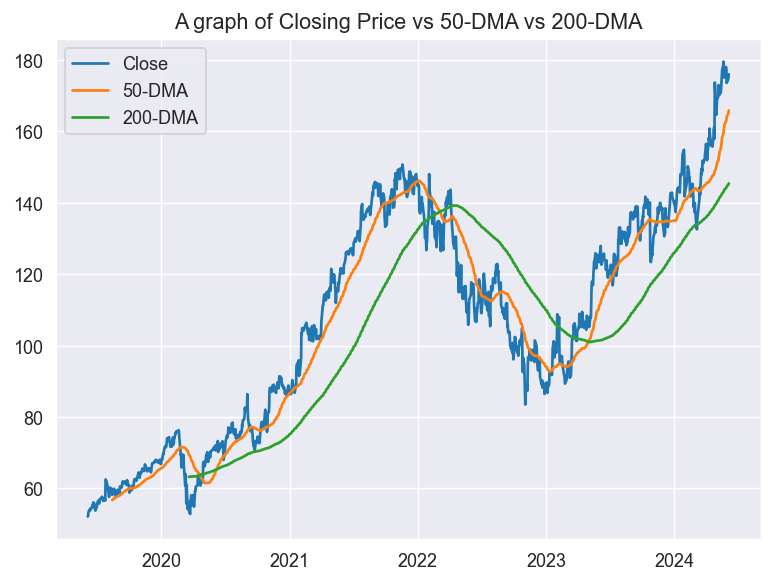

In [25]:
# Print closing Price vs the 50-DMA and the 200-DMA
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=130)
plt.title("A graph of Closing Price vs 50-DMA vs 200-DMA")
plt.plot(dataFrame1["Close"], label="Close")
plt.plot(dataFrame1["50-DMA"], label="50-DMA")
plt.plot(dataFrame1["200-DMA"], label="200-DMA")
plt.legend()


# Iferences drawn from the graph:
1. 50DMA and 200DMA are fairly good indicators of how the stock is moving.
2. If the closing price is above the 50DMA or 200DMA, it is usually on the uptrend or bullish.
3. If the closing price is below the 50DMA or 200DMA, it usually means that it is in a downward trend.
4. Every point where 50DMA and 200DMA intersect, the market usually reverses its trend (High -> Low | Low -> High).
5. The huge dip at 2020, indicates the Covid 19 market crash in the month of March .


# Finding the possible future movements of the Google Stock

In [26]:
# Here, you analyse the correlation between each variables


<Axes: >

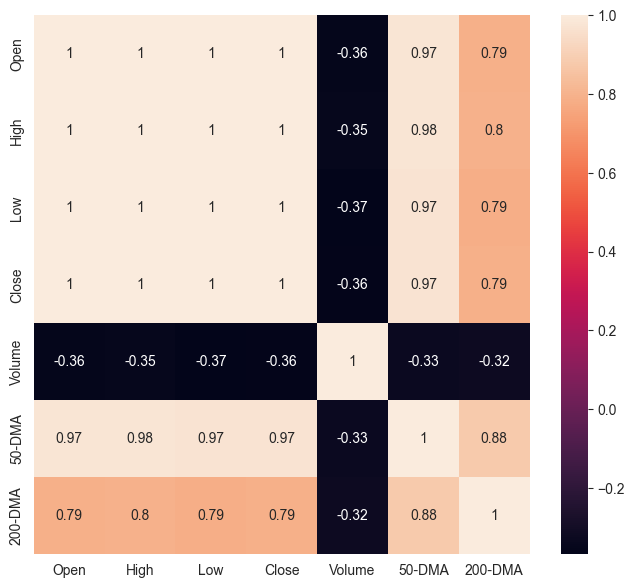

In [30]:
plt.figure(figsize=(8,7), dpi= 100)
sns.heatmap(dataFrame1.corr(), annot=True)
# seaborn's heatmap method plots the correlation in the heatmap, and the annot=True shows the numbers on the heatmap 


# Inferences from the heatmap
1. Closing price has very high correlation with almost all the variables except the volume
2. There is a strong multi-collinearity between the variables as well

In [34]:
# We now plot the displot of 50-DMA against the Closing Price


""" 
To plot the distplot of 50-DMA against the closing price, you can use the `sns.distplot()` function from the Seaborn library in Python. Here's how you can do it:

1. First, import the necessary libraries:

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```

2. Assuming you have your data in a pandas DataFrame named 'data', you can create separate columns for '50-DMA' and 'Close' if they don't already exist:

```python
data['50-DMA'] = data['Close'].rolling(window=50).mean()
```

3. Now, you can use the `sns.distplot()` function to plot the distribution of 50-DMA against the closing price:

```python
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(data['50-DMA'], ax=ax, label='50-DMA')
sns.distplot(data['Close'], ax=ax, label='Closing Price')
ax.set_title('Distribution of 50-DMA and Closing Price')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend()
plt.show()
```

This code will create a new figure with two distribution plots, one for the 50-DMA and another for the closing price. The `sns.distplot()` function calculates the kernel density estimate (KDE) of the data and plots it as a smooth curve.

You can customize the appearance of the plot by adjusting the parameters of the `sns.distplot()` function, such as the `kde` parameter (to control whether the KDE curve is plotted), `hist` parameter (to control whether a histogram is plotted), and `rug` parameter (to control whether a rugplot is added to the distribution plot).

Additionally, you can modify the figure size, axis labels, title, and legend using the corresponding matplotlib functions.

By plotting the distribution of 50-DMA and the closing price, you can visually compare the spread and density of the two variables, which can provide insights into their relationship and potential future movements.
"""


" \nTo plot the distplot of 50-DMA against the closing price, you can use the `sns.distplot()` function from the Seaborn library in Python. Here's how you can do it:\n\n1. First, import the necessary libraries:\n\n```python\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n```\n\n2. Assuming you have your data in a pandas DataFrame named 'data', you can create separate columns for '50-DMA' and 'Close' if they don't already exist:\n\n```python\ndata['50-DMA'] = data['Close'].rolling(window=50).mean()\n```\n\n3. Now, you can use the `sns.distplot()` function to plot the distribution of 50-DMA against the closing price:\n\n```python\nfig, ax = plt.subplots(figsize=(8, 6))\nsns.distplot(data['50-DMA'], ax=ax, label='50-DMA')\nsns.distplot(data['Close'], ax=ax, label='Closing Price')\nax.set_title('Distribution of 50-DMA and Closing Price')\nax.set_xlabel('Value')\nax.set_ylabel('Density')\nax.legend()\nplt.show()\n```\n\nThis code will create a new figure with t

In [35]:
dataFrame1['50-DMA'] = dataFrame1['Close'].rolling(window=50).mean()


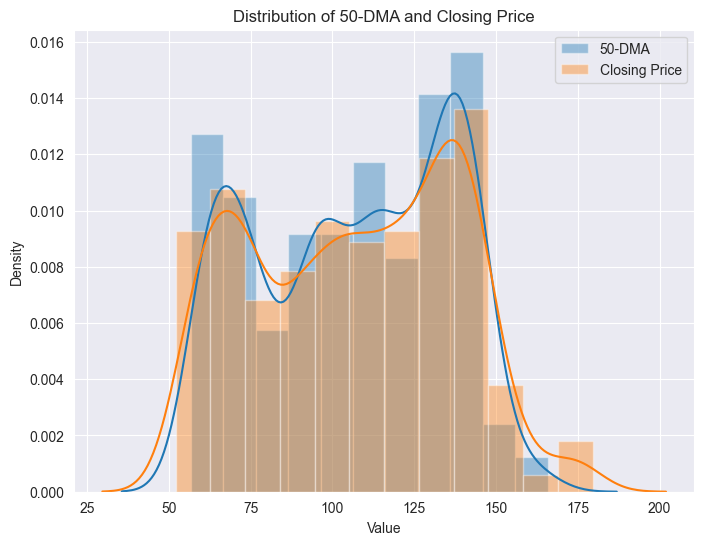

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(dataFrame1['50-DMA'], ax=ax, label='50-DMA')
sns.distplot(dataFrame1['Close'], ax=ax, label='Closing Price')
ax.set_title('Distribution of 50-DMA and Closing Price')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend()
plt.show()


In [38]:
# will revisit the graph above


In [39]:
import statsmodels.formula.api as smf


In [ ]:
model= smf.ols(formula= "Close ~ 50-DMA", data= dataFrame1)
